In [1]:
# reinforcement z-test, t-test, anova

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [11]:
# ONE SAMPLE T TEST

In [4]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

idf_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
idf_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
idf_ages = np.concatenate((idf_ages1, idf_ages2))

print( population_ages.mean() )
print( idf_ages.mean() )

43.000112
39.26


In [5]:
stats.ttest_1samp(a= idf_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

In [6]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [7]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.009575234489209

In [8]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test*

0.013121066545690117

In [9]:
sigma = idf_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = idf_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(36.369669080722176, 42.15033091927782)

In [10]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = idf_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(35.40547994092107, 43.11452005907893)

In [12]:
# TWO SAMPLE T TEST

In [13]:
np.random.seed(12)
paca_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
paca_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
paca_ages = np.concatenate((paca_ages1, paca_ages2))

print( paca_ages.mean() )

42.8


In [14]:
stats.ttest_ind(a= idf_ages,
                b= paca_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

In [15]:
# PAIRED T TEST

In [16]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [17]:
stats.ttest_rel(a= weight_df.weight_before,
                b= weight_df.weight_after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

In [18]:
# ANOVA

In [23]:
np.random.seed(12)

groups =   ["g1","g2","g3","g4","g5", "g6", "g7"]

# Generate random data
voter_group = np.random.choice(a= groups,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.25, 0.125, 0.125],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by group
voter_frame = pd.DataFrame({"group":voter_group,"age":voter_age})
gps = voter_frame.groupby("group").groups

# Etract individual groups
g1 = voter_age[gps["g1"]]
g2 = voter_age[gps["g2"]]
g3 = voter_age[gps["g3"]]
g4 = voter_age[gps["g4"]]
g5 = voter_age[gps["g5"]]
g6 = voter_age[gps["g6"]]
g7 = voter_age[gps["g7"]]

# Perform the ANOVA
stats.f_oneway(g1, g2, g3, g4, g5, g6, g7)

F_onewayResult(statistic=1.4407265239799805, pvalue=0.19583793303843983)

In [25]:
# Get all gorup pairs
group_pairs = []

for gp1 in range(4):
    for gp2  in range(gp1+1,7):
        group_pairs.append((groups[gp1], groups[gp2]))

# Conduct t-test on each pair
for gp1, gp2 in group_pairs: 
    print(gp1, gp2)
    print(stats.ttest_ind(voter_age[gps[gp1]], 
                          voter_age[gps[gp2]]))

g1 g2
Ttest_indResult(statistic=1.4723166654510063, pvalue=0.14259864916065687)
g1 g3
Ttest_indResult(statistic=0.7952576949464497, pvalue=0.42712310624411387)
g1 g4
Ttest_indResult(statistic=0.023943564194904926, pvalue=0.9809494819541007)
g1 g5
Ttest_indResult(statistic=1.860203655851984, pvalue=0.06385858384096696)
g1 g6
Ttest_indResult(statistic=1.9500917862114706, pvalue=0.05285990753724046)
g1 g7
Ttest_indResult(statistic=1.0436500096419603, pvalue=0.29802403848297954)
g2 g3
Ttest_indResult(statistic=-0.9779887872139286, pvalue=0.328687679434698)
g2 g4
Ttest_indResult(statistic=-1.537940275215305, pvalue=0.12568427083007871)
g2 g5
Ttest_indResult(statistic=0.33279404799700385, pvalue=0.7394658589884084)
g2 g6
Ttest_indResult(statistic=0.6630318128974703, pvalue=0.5078800399468361)
g2 g7
Ttest_indResult(statistic=-0.5844883518531755, pvalue=0.5593525681627008)
g3 g4
Ttest_indResult(statistic=-0.8181367221979297, pvalue=0.41394624196541574)
g3 g5
Ttest_indResult(statistic=1.5448191

In [2]:
# CHI SQUARED

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [42]:
# Test du Chi2
# Goodness of fit : H0 : pas de différence entre les deux distributions observed vs expected / H1 : différence
# Independance : H0 : il y a indépendance entre les deux variables catégorielles / H1: pas d'indépendance
# Chi2-stat = (observed - expected)**2 / expected
# Chi2-stat suit une loi de distribution du Chi2 à df degrés de libertés
# Cas de goodness of fit, on a une série de N valeurs : df = N-1
# Cas du test d'indépendance, df = (#lignes - 1) * (#colonnes - 1)
# p-value = Prob(X >= Chi2-stat | Chi2(df))
# Si p-value >= alpha (0.05, 0.01), on ne peut rejeter H0
# Sinon, on rejette H0

In [4]:
national = pd.DataFrame(["g1"]*100000 + ["g2"]*60000 +\
                        ["g3"]*50000 + ["g4"]*15000 + ["g5"]*35000)
           

idf = pd.DataFrame(["g1"]*600 + ["g2"]*300 + \
                         ["g3"]*250 +["g4"]*75 + ["g5"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
idf_table = pd.crosstab(index=idf[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Ile de France")
print(idf_table)

National
col_0   count
0            
g1     100000
g2      60000
g3      50000
g4      15000
g5      35000
 
Ile de France
col_0  count
0           
g1       600
g2       300
g3       250
g4        75
g5       150


In [50]:
idf_table

col_0,count
0,
g1,600
g2,300
g3,250
g4,75
g5,150


In [44]:
prop_g1 = 100/(100 + 60 + 50 + 15 + 35)
prop_g1

0.38461538461538464

In [46]:
expected_g1 = prop_g1 * (600 + 300 + 250 + 75 + 150)
expected_g1

528.8461538461539

In [47]:
(600 - 528)**2/528

9.818181818181818

In [5]:
observed = idf_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(idf)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


In [6]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

Critical value
9.487729036781154
P value
[0.00113047]


In [7]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

In [8]:
# Test of independance

In [9]:
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_group = np.random.choice(a= ["g1","g2","g3","g4","g5"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"group":voter_group, 
                       "party":voter_party})

voter_tab = pd.crosstab(voters.group, voters.party, margins = True)

voter_tab.columns = ["democrat","independent","republican","row_totals"]

voter_tab.index = ["g1","g2","g3","g4","g5","col_totals"]

observed = voter_tab.iloc[0:5,0:3]   # Get table without totals for later use
voter_tab

,democrat,independent,republican,row_totals
g1,21,7,32,60
g2,65,25,64,154
g3,107,50,94,251
g4,15,8,15,38
g5,189,96,212,497
col_totals,397,186,417,1000


In [11]:
expected =  np.outer(voter_tab["row_totals"][0:5],
                     voter_tab.loc["col_totals"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["democrat","independent","republican"]
expected.index = ["g1","g2","g3","g4","g5"]

expected

,democrat,independent,republican
g1,23.820,11.160,25.020
g2,61.138,28.644,64.218
g3,99.647,46.686,104.667
g4,15.086,7.068,15.846
g5,197.309,92.442,207.249


In [12]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

7.169321280162059


In [13]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

Critical value
15.50731305586545
P value
0.518479392948842


In [14]:
stats.chi2_contingency(observed= observed)

(7.169321280162059,
 0.518479392948842,
 8,
 array([[ 23.82 ,  11.16 ,  25.02 ],
        [ 61.138,  28.644,  64.218],
        [ 99.647,  46.686, 104.667],
        [ 15.086,   7.068,  15.846],
        [197.309,  92.442, 207.249]]))

In [15]:
# CRAMER'S V

In [30]:
import scipy.stats as ss

In [38]:
from scipy.stats import chi2_contingency

In [39]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [25]:
df = pd.read_csv("jvc.csv")

In [26]:
df.head()

,Unnamed: 0,game_fr,game_en,platform,website_rating,public_rating,publishor/developer,release,type,classification,url,description
0,1,.hack//G.U. Last Recode,.hack//G.U. Last Recode,PS4,14/20,--/20,Bandai Namco Entertainment,03 Novembre 2017,RPG,+12 ans,http://www.jeuxvideo.com/jeux/ps4/jeu-674262/,"Au contraire d’autres titres, None ,''.hack'' ..."
1,2,.hack//G.U. Vol.1//Rebirth,.hack//G.U. Vol. 1//Rebirth,PS2,15/20,18.2/20,Bandai Namco CyberConnect2,Date de sortie inconnue,RPG,+7 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Avec plus de 20 œuvres de fiction sur de mult...
2,3,.hack//Infection Part 1,.hack//Infection: Part 1,PS2,15/20,15.1/20,CyberConnect2 Bandai,26 Mars 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,S'appuyant sur la maxime « Mieux vaut tard qu...
3,4,.hack//Mutation Part 2,.hack//Mutation: Part 2,PS2,14/20,16.4/20,Bandai CyberConnect2,18 Juin 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Voici enfin le second volet de la quadrilogie...
4,5,.hack//Outbreak Part 3,.hack//Outbreak: Part 3,PS2,13/20,15.3/20,CyberConnect2 Atari,17 Septembre 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Comme la maxime «Jamais deux sans trois» ne c...


In [27]:
confusion_matrix = pd.crosstab(df.type, df.classification)

In [28]:
confusion_matrix

classification,+12 ans,+16 ans,+17 ans,+18 ans,+3 ans,+4 ans,+7 ans,+9 ans,Unknown
type,,,,,,,,,
4X,1,0,0,0,0,0,1,0,1
Action,306,209,2,191,193,3,108,5,158
Action Action RPG,0,0,0,0,0,0,0,0,2
Action Action RPG Dungeon RPG,0,0,0,0,0,0,0,0,1
Action Adresse,2,0,0,0,2,1,0,0,3
...,...,...,...,...,...,...,...,...,...
Visual Novel RPG,0,0,0,0,0,0,0,0,1
Visual Novel Rythme,0,0,0,0,0,1,0,0,0
Wargame,6,0,0,0,9,0,2,0,9


In [40]:
cramers_V(df.type, df.classification)

0.18305399966174624

In [51]:
import pandas
import matplotlib.pyplot as plt
import seaborn

In [53]:
df

,Factor,Weight,Variance
0,Growth,0.1,0.15
1,Value,0.2,0.35


In [58]:
df = pandas.DataFrame({
    'etabl': ['et1', 'et2'],
    'men': [0.10, 0.20],
    'women': [0.15, 0.35]
})
tidy = df.melt(id_vars='etabl').rename(columns=str.title)
tidy

,Etabl,Variable,Value
0,et1,men,0.10
1,et2,men,0.20
2,et1,women,0.15
3,et2,women,0.35


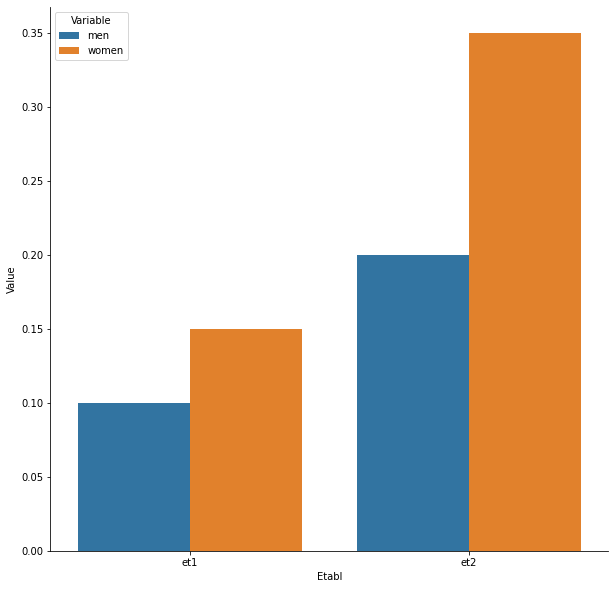

In [60]:
fig, ax1 = plt.subplots(figsize=(10, 10))
seaborn.barplot(x='Etabl', y='Value', hue='Variable', data=tidy, ax=ax1)
seaborn.despine(fig)

In [62]:
pop = np.random.randn(30, 5, shape=(1000))

TypeError: randn() got an unexpected keyword argument 'shape'

In [65]:
pop = 10 * np.random.randn(10000) + 30

In [66]:
pop

array([33.18788747, 44.90912191, 25.20818721, ..., -0.06811994,
       15.01076948, 32.22132343])

In [67]:
s = np.randaom.sample(100)

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [71]:
s = np.random.choice(pop, 100)

In [72]:
s

array([34.12157759, 15.16300959, 34.3306454 , 26.9194712 , 38.42662746,
       36.60934426, 50.58352529, 17.1552867 , 33.08624585, 38.82759671,
       22.87857634, 24.80053729, 36.01789959, 14.98781248, 25.57358406,
       34.30301062, 45.78741338, 24.03870922, 47.11117445,  5.47109999,
       36.64758784, 16.97844917, 33.37150399, 16.90450527, 17.21018386,
        0.85037164, 32.60117429, 51.7070853 , 45.42198379, 40.02230953,
       37.87871868, 16.16125747, 27.80136029, 20.88526137, 10.79122444,
       17.72332305, 38.82766919, 36.25884669, 27.03562816, 35.55579617,
       31.41193685, 20.15099904, 22.71431427, 35.66881624, 30.79939601,
       35.39446202, 38.09196763, 32.00202722, 37.23236825, 27.49860793,
       26.39200001, 26.4717304 , 33.78958375, 32.84071858, 37.1589819 ,
       12.06095611, 28.41890437, 37.85744834, 22.0558153 , 17.98102105,
       22.63481682, 17.8603345 , 43.23535917, 36.18786526, 31.22125915,
       20.67353468, 36.90696199, 29.43608741, 35.39339797, 32.67

In [74]:
mu = s.mean()

In [76]:
mu_emp = []
for i in range(1000):
    s_bootstrap = np.random.choice(s, 100, replace=True)
    mu_emp.append(s_bootstrap.mean())

In [77]:
mu_emp

[29.942713423592796,
 31.023484407123405,
 30.63748680115812,
 29.530037481682303,
 29.533389368228246,
 29.513396015329104,
 30.527116577727803,
 29.469100266073887,
 29.909636666674768,
 30.189936623793532,
 28.964844734869224,
 27.618612911268148,
 29.649127148339904,
 30.381637911626004,
 29.73299033339189,
 30.76209064854299,
 29.516912632785676,
 28.75644853063989,
 30.719640683126823,
 29.116370945370637,
 27.136508440642732,
 27.99227835765717,
 29.527799596977783,
 29.90053892632682,
 30.7329116525208,
 28.384828242092855,
 30.0078568134982,
 29.772481670782796,
 29.85922527120652,
 29.63249639138837,
 30.34710168780366,
 28.75769644981827,
 29.625361002702313,
 28.94457235406261,
 29.055555969753808,
 30.449012109410283,
 31.798166934383357,
 30.18109540225411,
 30.048666804514568,
 29.346361947135154,
 30.754754701634027,
 28.99794313635779,
 29.322143961449378,
 28.150490332042864,
 30.868441812874867,
 30.08223109160182,
 30.619455631746952,
 28.160429588010402,
 28.720105

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

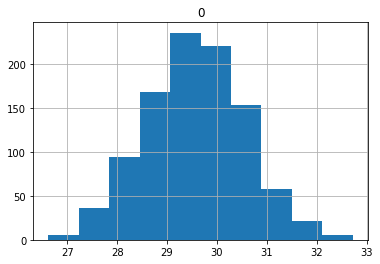

In [78]:
pd.DataFrame(mu_emp).hist()

In [81]:
mu_emp_df = pd.DataFrame(mu_emp)

In [88]:
mu_emp_df.quantile(0.005)

0    27.184764
Name: 0.005, dtype: float64

In [89]:
mu_emp_df.quantile(0.995)

0    32.035932
Name: 0.995, dtype: float64

In [86]:
mu_emp_df.mean()

0    29.572159
dtype: float64

In [87]:
mu

29.542808443357657

In [90]:
pop.mean()

30.142205329804465

In [91]:
from scipy.stats import norm

In [94]:
norm.interval(0.95, loc=mu, scale=s.std()/np.sqrt(100))

(27.613155589381837, 31.472461297333478)